In [2]:
from scipy import *
import matplotlib.pylab as plt
import numpy as np
from math import *
import pandas as pd

# Ejemplo: Gradiente descendiente

![Homer](1_Wj0IlRPf3cSL-k-_WLy8hQ.gif "Homer descending")

In [34]:
# MODELO
def model(M, theta):
    phi_ast = theta[0]
    M_ast = theta[1]
    alpha = theta[2]
    A = 0.4*np.log(10)*phi_ast
    f = 10**(0.4*(M_ast-M)*(alpha+1))
    g = np.exp(-10**(0.4*(M_ast-M)))
    y = A*f*g
    return(y)

    # alpha: pendiente del extremo debil
    # M_ast: magnitud absoluta caracteristica
    # phi_ast: factor de normalizacion
    
def dMdphi(M, theta):
    phi_ast = theta[0]
    M_ast = theta[1]
    alpha = theta[2]    
    A = 0.4*np.log(10)
    f = 10**(0.4*(M_ast-M)*(alpha+1))
    g = np.exp(-10**(0.4*(M_ast-M)))
    y = A*f*g
    return(y)
    
def dMdMast(M, theta):
    phi_ast = theta[0]
    M_ast = theta[1]
    alpha = theta[2]
    A = 0.4*np.log(10)*phi_ast
    f = 10**(0.4*(M_ast-M)*(alpha+1))
    g = np.exp(-10**(0.4*(M_ast-M)))
    df = 10**(0.4*(M_ast-M)*(alpha+1))*0.4*np.log(10)*(alpha+1)
    dg = -np.exp(-10**(0.4*(M_ast-M)))*0.4*np.log(10)
    
    y = A * (df*g + f*dg)    
    return(y)

def dMdalpha(M, theta):
    phi_ast = theta[0]
    M_ast = theta[1]
    alpha = theta[2]
            
    A = 0.4*np.log(10)*phi_ast
    df = 10**(0.4*(M_ast-M)*(alpha+1))*0.4*np.log(10)*(M_ast-M)
    g = np.exp(-10**(0.4*(M_ast-M)))
    
    y = A*df*g            
    return(y)

def Chi2(D,theta):
    phi_ast = theta[0]
    M_ast = theta[1]
    alpha = theta[2]

    S = 0
    N = np.size(D['L'])
    for i in range(N):
        M = model(D['L'][i], theta)
        S = S - (D['F'][i] -M)**2
    return(S)


def dChidMast(D,theta):
    phi_ast = theta[0]
    M_ast = theta[1]
    alpha = theta[2]

    S = 0
    N = np.size(D['L'])
    for i in range(N):
        M = model(D['L'][i], theta)
        S = S - (D['F'][i] -M)*dMdMast(D['L'][i], theta)
    return(S)
    
def dChidalpha(D, theta):
    phi_ast = theta[0]
    M_ast = theta[1]
    alpha = theta[2]

    S = 0
    N = np.size(D['L'])
    for i in range(N):
        M = model(D['L'][i], theta)
        S = S - (D['F'][i] -M)*dMdalpha(D['L'][i], theta)
    return(S)
    
def dChidphi(D, theta):
    phi_ast = theta[0]
    M_ast = theta[1]
    alpha = theta[2]

    S = 0
    N = np.size(D['L'])
    for i in range(N):
        M = model(D['L'][i], theta)
        S = S - (D['F'][i] -M)*dMdphi(D['L'][i], theta)
    return(S)


def gradM(D, theta):    
    a1 = dChidphi(D, theta)
    a2 = dChidMast(D, theta)
    a3 = dChidalpha(D, theta)
    return(np.array([a1, a2, a3]))

In [35]:
D = pd.read_csv('data/Dataset.csv')

In [5]:
D.keys()

Index(['L', 'F'], dtype='object')

In [6]:
x = D['L']
y = np.log10(D['F'])

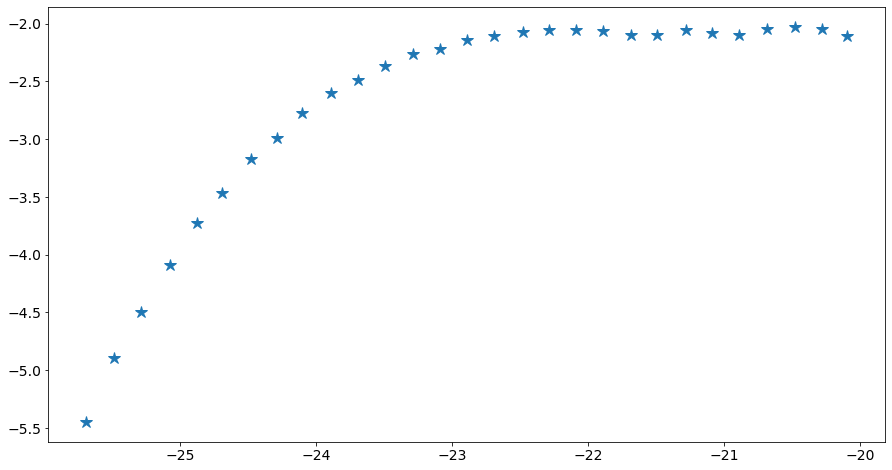

In [7]:
fig = plt.figure(figsize=(15,8))
plt.plot(x, y, '*', markersize=12)
plt.show()

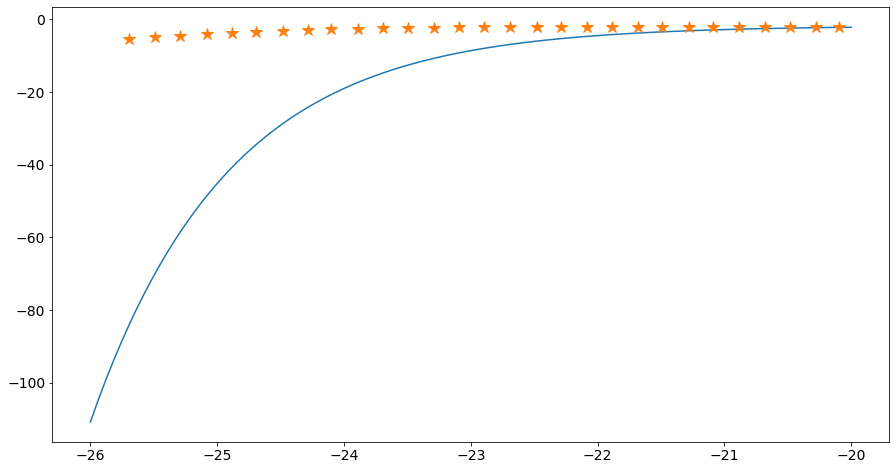

In [94]:
phi_ast = 0.02
M_ast = -20.
alpha = -1
theta = [phi_ast, M_ast, alpha]

M = np.linspace(start=-26., stop=-20., num=100)
F = [model(m, theta) for m in M]
F = np.log10(F)

fig = plt.figure(figsize=(15,8))
plt.plot(M,F)
plt.plot(x, y, '*', markersize=12)
plt.show()

In [98]:
phi_ast = 0.01
M_ast = -20.
alpha = -1
theta = np.array([phi_ast, M_ast, alpha])
eta = 100.

In [99]:
for _ in range(1000):
    G = gradM(D, theta)    
    #print(eta*G)
    theta = theta - eta*G
    
print([phi_ast, M_ast, alpha])
print(theta)

[0.01, -20.0, -1]
[-15.69255927  -8.89419468  -4.33960917]


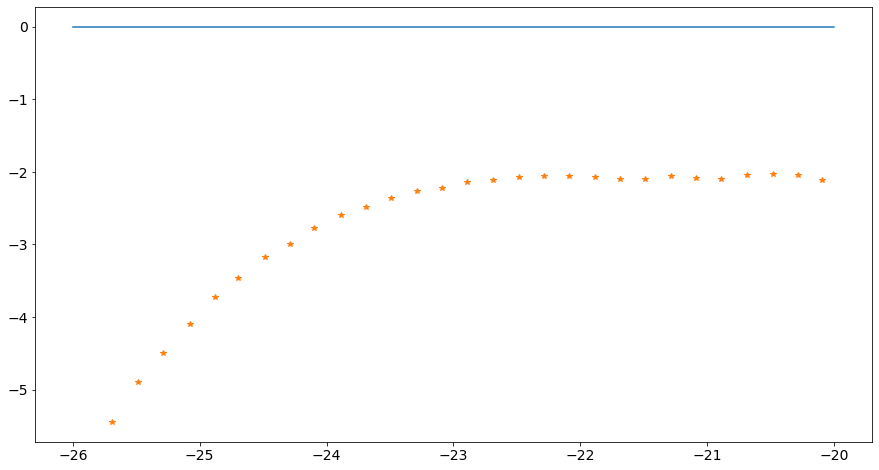

In [100]:
F = [model(m, theta) for m in M]
#F = np.log10(F)

fig = plt.figure(figsize=(15,8))
plt.plot(M,F)
plt.plot(x, y, '*')
plt.show()

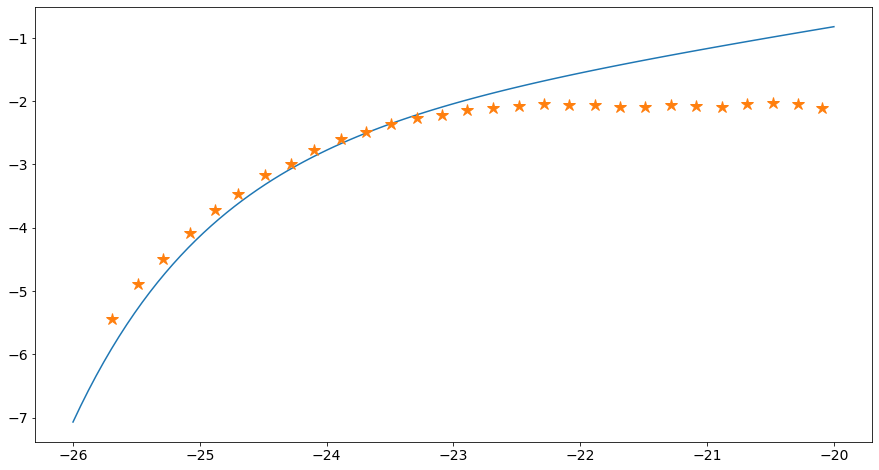

In [60]:
phi_ast = 1.28309739e-02
M_ast = -23.5
alpha = -1.8
theta = [phi_ast, M_ast, alpha]

M = np.linspace(start=-26., stop=-20., num=100)
F = [model(m, theta) for m in M]
F = np.log10(F)

fig = plt.figure(figsize=(15,8))
plt.plot(M,F)
plt.plot(x, y, '*', markersize=12)
plt.show()

# Ejemplo: LM fit

In [56]:
""" Given the set of points generated by f(x) = e^(2 * x) + 3 * x with some
noise, use Levenberg-Marquardt algorithm to find the model to fit
all the points.
"""

import numpy as np
import scipy.optimize as scipy_opt

def exp_func(x_data, a, b):
    """ Computes the function e^(a * x) + b * x
    Args:
        x_data : A Numpy array of input data
        a : Real-valued argument of the function
        b : Real-valued argument of the function

    Returns:
        A Numpy array of values of the function e^(a * x) + b * x evaluated
        at each x in xData
    """
    return np.exp(a * x_data) + b * x_data



""" Main function to set up data points and calls Scipy curve fitting
routine (whose underlying algorithm is Levenberg-Marquardt)
"""
x_data = np.array([
    2.2, 2.0, 1.9, 1.8, 1.28, 1.33, 1.12, 1.1, 0.8, 0.5, 1.7, 1.5, -14.8,
    -14.0, -12.0, -1.5, 1.0, 0.0, -1.0, -2.0, -5.0, -3.0, -4.0, -10.0,
    -15.0, -6.0, -4.50
])
y_data = np.array([
    88.0, 60.6, 50.4, 42.0, 16.7758, 18.286, 12.75, 12.33, 7.35, 4.22,
    35.0, 14.62, -44.4, -42.0, -35.9, -4.4502, 10.4, 0.99, -2.87, -5.98,
    -15.0, -8.9, -11.9996, -30.0, -43.0, -17.99999, -13.499877
])


Nguess= 40
guess_abs = [[0.0, 4.0], [5.5, -10.5], [-0.1, 100.0], [8.9, 5.0]]

res_abs = []
for guess_ab in guess_abs:
    ab, covariance = scipy_opt.curve_fit(exp_func, x_data, y_data, guess_ab)
    res_abs.append(ab)

/tmp/ipykernel_44031/1991758216.py:2: DeprecationWarning: scipy.sort is deprecated and will be removed in SciPy 2.0.0, use numpy.sort instead
  x = sort(x_data)


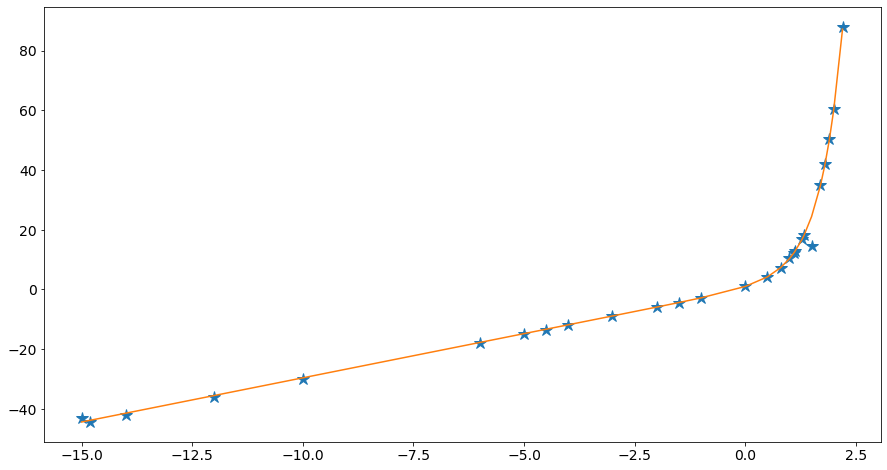

In [64]:
a, b = ab
x = sort(x_data)
y = exp_func(x, a, b)

fig = plt.figure(figsize=(15,8))
plt.plot(x_data, y_data, '*', markersize=12)
plt.plot(x, y)
plt.show()

NameError: name 'res_ab' is not defined

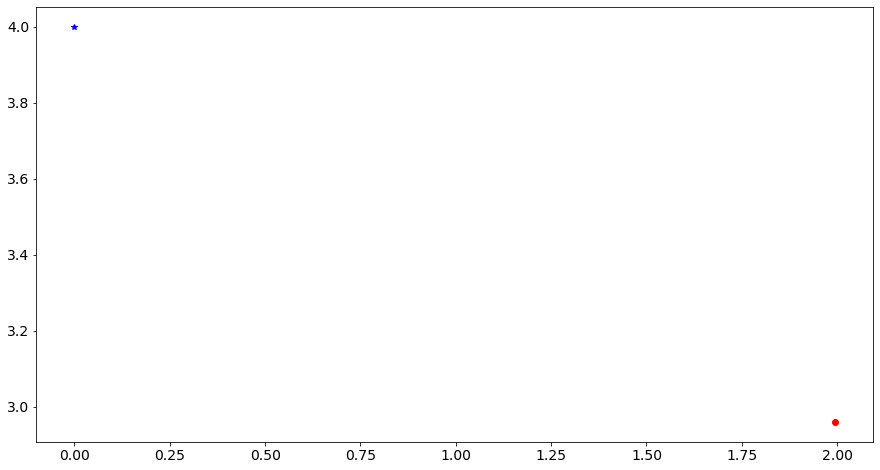

In [62]:
Nguess=4

fig = plt.figure(figsize=(15,8))
for i in range(Nguess):
    plt.plot(guess_abs[i][0], guess_abs[i][1],'b*')
    plt.plot(res_abs[i][0], res_abs[i][1],'ro')
    # join points:
    xj = np.array([guess_abs[i][0], res_ab[i][0]])
    yj = np.array([guess_abs[i][1], res_ab[i][1]])
    
    plt.plot(xj, yj, '-k')
plt.show()

# NEWTON

In [59]:
from scipy import optimize
def f(x):
    return -np.exp(-(x - 0.7)**2)
result = optimize.minimize_scalar(f)

In [60]:
def f(x):   # The rosenbrock function
    return .5*(1 - x[0])**2 + (x[1] - x[0]**2)**2
def jacobian(x):
    return np.array((-2*.5*(1 - x[0]) - 4*x[0]*(x[1] - x[0]**2), 2*(x[1] - x[0]**2)))
optimize.minimize(f, [2,-1], method="Newton-CG", jac=jacobian) 

     fun: 1.5601357400786612e-15
     jac: array([ 1.05753092e-07, -7.48325277e-08])
 message: 'Optimization terminated successfully.'
    nfev: 11
    nhev: 0
     nit: 10
    njev: 33
  status: 0
 success: True
       x: array([0.99999995, 0.99999988])

In [61]:
def hessian(x): # Computed with sympy
    return np.array(((1 - 4*x[1] + 12*x[0]**2, -4*x[0]), (-4*x[0], 2)))
optimize.minimize(f, [2,-1], method="Newton-CG", jac=jacobian, hess=hessian)

     fun: 1.6277298383706738e-15
     jac: array([ 1.11044158e-07, -7.78093352e-08])
 message: 'Optimization terminated successfully.'
    nfev: 11
    nhev: 10
     nit: 10
    njev: 11
  status: 0
 success: True
       x: array([0.99999994, 0.99999988])